<a href="https://colab.research.google.com/github/nath229/My-first-Github-project-with-Eckovation/blob/master/machine_learning_expert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the required libraries

In [129]:
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalAveragePooling2D,GlobalMaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import keras.backend as K

#CNN model 

In [ ]:
def Keras_Model():
    num_of_classes = 10
    model = Sequential()
    model.add(Conv2D(filters=10,kernel_size=(5,5),input_shape=(28,28,3),activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
    model.add(Conv2D(56,(5,5),activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5),padding='same'))
    model.add(Flatten())
    model.add(Dense(num_of_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

    filepath = 'utpal.h5'
    checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose = 1 , save_best_only = True , mode='max')
    callbacks_list = [checkpoint1]
    return model,callbacks_list

#Function to extract X_train,y_train,X_test and Y_test images 

In [130]:
import gzip
import numpy as np


def Training_images():
    with gzip.open('/content/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        train_images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return train_images


def Training_labels():
    with gzip.open('/content/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        train_labels = np.frombuffer(label_data, dtype=np.uint8)
        return train_labels

def Testing_images():
    with gzip.open('/content/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        test_images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return test_images

def Testing_labels():
    with gzip.open('/content/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        test_labels = np.frombuffer(label_data, dtype=np.uint8)
        return test_labels

#Calling the Functions

In [131]:
train_images = Training_images() 
train_labels  = Training_labels()
test_images = Testing_images()
test_labels = Testing_labels()

In [132]:
train_images.shape

(60000, 28, 28)

In [133]:
train_labels.shape

(60000,)

In [143]:
t = np.vstack(train_labels)

In [148]:
t.shape

(60000, 1)

In [150]:
y_train = np_utils.to_categorical(t)

In [151]:
y_train.shape

(60000, 10)

In [134]:
test_images.shape

(10000, 28, 28)

In [135]:
test_labels.shape

(10000,)

#Show some sample of train images

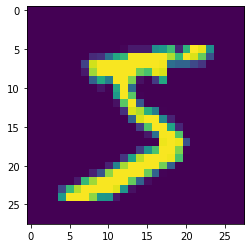

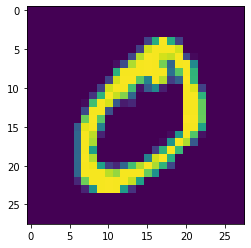

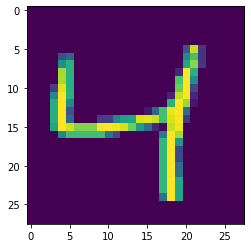

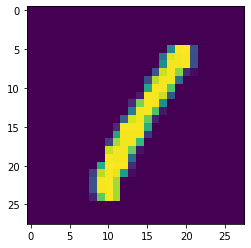

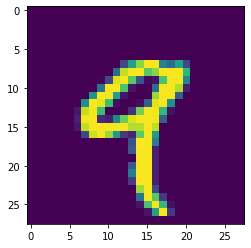

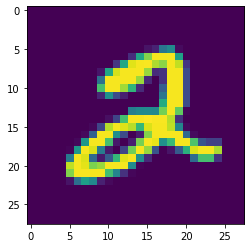

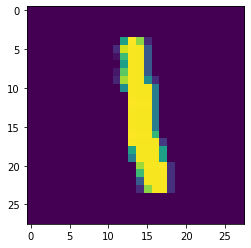

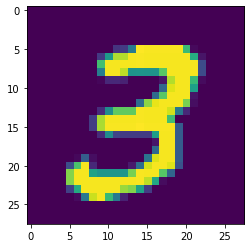

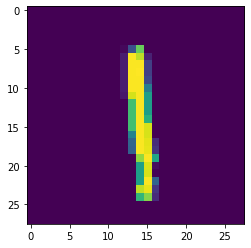

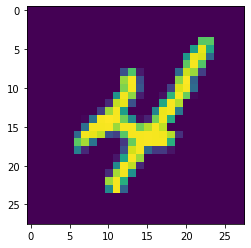

In [136]:
import matplotlib.pyplot as plt
for i in range(0,10):
    image = np.asarray(train_images[i]).squeeze()
    image = image/255 # to reduce calculation
    plt.imshow(image)
    plt.show()

#Show some sample of labels of train data

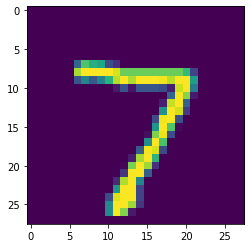

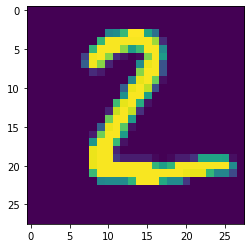

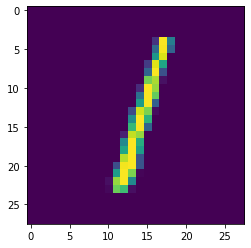

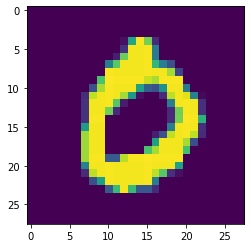

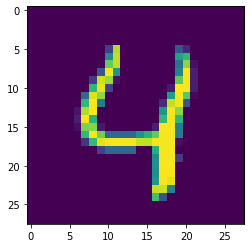

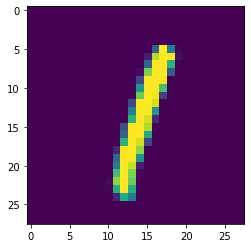

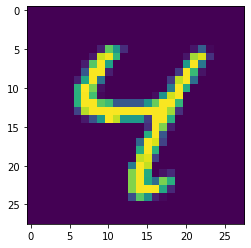

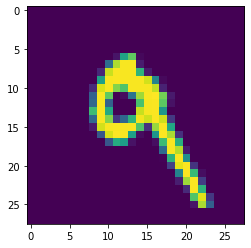

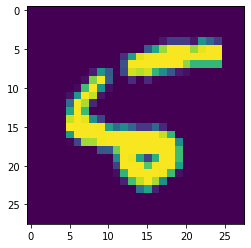

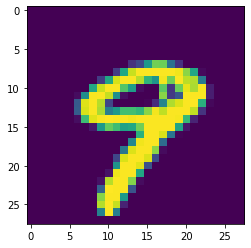

In [137]:
import matplotlib.pyplot as plt
for i in range(0,10):
    image = np.asarray(test_images[i]).squeeze()
    image = image/255 # to reduce calculation
    plt.imshow(image)
    plt.show()

In [140]:
model , callbacks_list = Keras_Model()
model.fit(train_images,train_labels,epochs = 8,batch_size = 56, callbacks = callbacks_list )
scores = model.evaluate(test_images,test_labels,verbose = 0)
print("CNN error :%2f%% "%(100-scores[1]*100))
model.save('Utpal_reload.h5')

Epoch 1/8


ValueError: ignored